**OM 421 Case 1 - Fall 2023**

Assume that you have been hired as a group of consultants for a company that owns and operates a bike-sharing service in a large metropolitan area. The company has specific questions they want you to investigate and have provided you three months of trip data. Please answer the questions using `code` and `markdown` cells as needed.

You may complete this assignment in groups of **up to** three. Please list the name and mybama username for each group member:
- Member 1 (mybama username 1)
- Member 2 (mybama username 2)
- Member 3 (mybama username 3)

The following code block imports libraries you may find useful.

In [1]:
import warnings
warnings.simplefilter('ignore')

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st
import seaborn as sns

pd.set_option('display.max_columns', None)

The following code block loads the raw data and does some basic data preparation steps. **Note that the code assumes the data file is in the same directory as the notebook (please don't do something different).**

In [2]:
data = pd.read_csv('bike_trip_data.csv')

data = data.drop(
    columns=[
        'start_lat', 
        'start_lon', 
        'end_lat', 
        'end_lon',  
        'plan_duration',
    ],
)

data['start_time'] = pd.to_datetime(data['start_time'])
data['start_date'] = pd.to_datetime(data['start_time'].dt.date)
data['start_day'] = data['start_date'].dt.day_name()
data['start_hour'] = data['start_time'].dt.hour

data['end_time'] = pd.to_datetime(data['end_time'])
data['end_date'] = pd.to_datetime(data['end_time'].dt.date)
data['end_day'] = data['end_date'].dt.day_name()
data['end_hour'] = data['end_time'].dt.hour

data.shape

(109436, 16)

The first five rows of the data are shown below.

In [3]:
data['start_date'].min()

Timestamp('2023-04-01 00:00:00')

In [4]:
data['start_date'].max()

Timestamp('2023-06-30 00:00:00')

In [5]:
data.groupby('start_day').agg(
    unique_dates=('start_date', 'nunique')
)

,unique_dates
start_day,
Friday,13
Monday,13
Saturday,13
Sunday,13
Thursday,13
Tuesday,13
Wednesday,13


**Q1:** Is there a statistically significant difference in the number of trips taken by day of week (Monday, Tuesday, etc.)? If there is, what pattern exists? Use appropriate analyses or visualizations to justify your answer. (**10 pts**)

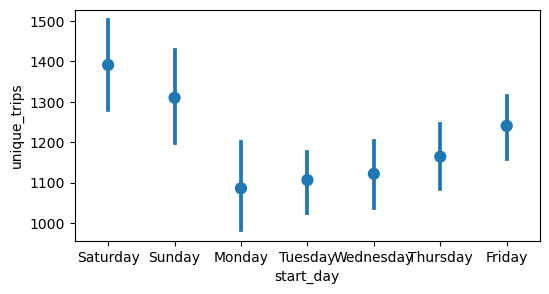

In [6]:
trips_by_day = data.groupby(
    ['start_date', 'start_day']
).agg(
    unique_trips=('trip_id', 'nunique')
).reset_index()

fig, ax = plt.subplots(1, 1, figsize=(6, 3))

sns.pointplot(
    trips_by_day,
    x='start_day',
    y='unique_trips',
    join=False,
)

plt.show()

**Q2:** Is there a statistically significant difference in the number of trips taken by hour of day? If there is, what pattern exists? Use appropriate analyses or visualizations to justify your answer. (**10 pts**)

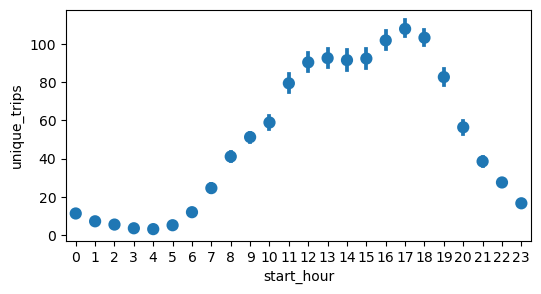

In [7]:
trips_by_hour = data.groupby(
    ['start_date', 'start_hour']
).agg(
    unique_trips=('trip_id', 'nunique')
).reset_index()

fig, ax = plt.subplots(1, 1, figsize=(6, 3))

sns.pointplot(
    trips_by_hour,
    x='start_hour',
    y='unique_trips',
    join=False,
)

plt.show()

**Q3:** Fit a distribution for the number of trips that stat during the peak hour of the day. For this analysis, ignore day of week effects. Provide some justification for why you feel the fitted distribution is a good choice. (**20 pts**)

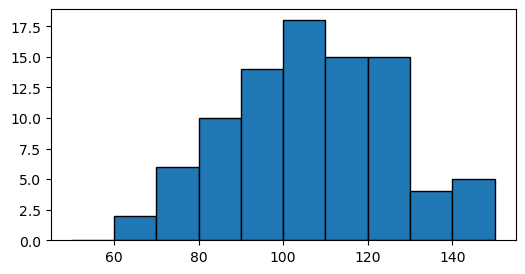

In [8]:
hour_17_data = data[data['start_hour']==17]
hour_17_trips = hour_17_data.groupby(
    'start_date'
).agg(
    unique_trips=('trip_id', 'nunique')
).reset_index()

fig, ax = plt.subplots(1, 1, figsize=(6, 3))

ax.hist(
    hour_17_trips['unique_trips'],
    bins=[50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150],
    edgecolor='k',
)

plt.show()

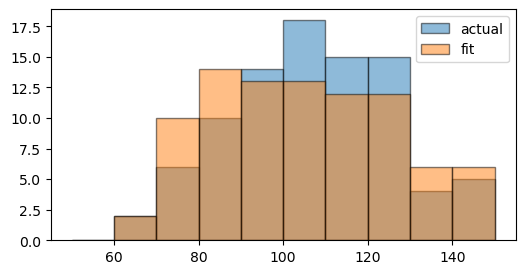

RSS =81


In [9]:
values_to_fit = hour_17_trips['unique_trips'].values

current_dist = st.triang
best_parameters = current_dist.fit(values_to_fit)
best_dist = current_dist(*best_parameters)

fig, ax = plt.subplots(1, 1, figsize=(6, 3))

ax.hist(
    hour_17_trips['unique_trips'],
    bins=[50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150],
    edgecolor='k',
    alpha=0.5,
    label='actual',
)

ax.hist(
    best_dist.rvs(len(values_to_fit), random_state=42),
    bins=[50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150],
    edgecolor='k',
    alpha=0.5,
    label='fit',
)
ax.legend()
plt.show()

data_counts, data_bins = np.histogram(values_to_fit, bins=[50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150])

random_data = best_dist.rvs(len(values_to_fit), random_state=42)
random_counts, random_bins = np.histogram(random_data, bins=[50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150])
RSS = np.sum((data_counts - random_counts)**2)

print(f'{RSS =}')

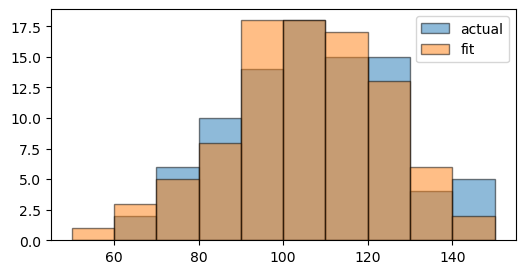

RSS =44


In [10]:
values_to_fit = hour_17_trips['unique_trips'].values

current_dist = st.norm
best_parameters = current_dist.fit(values_to_fit)
best_dist = current_dist(*best_parameters)

fig, ax = plt.subplots(1, 1, figsize=(6, 3))

ax.hist(
    hour_17_trips['unique_trips'],
    bins=[50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150],
    edgecolor='k',
    alpha=0.5,
    label='actual',
)

ax.hist(
    best_dist.rvs(len(values_to_fit), random_state=42),
    bins=[50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150],
    edgecolor='k',
    alpha=0.5,
    label='fit',
)
ax.legend()
plt.show()

data_counts, data_bins = np.histogram(values_to_fit, bins=[50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150])

random_data = best_dist.rvs(len(values_to_fit), random_state=42)
random_counts, random_bins = np.histogram(random_data, bins=[50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150])
RSS = np.sum((data_counts - random_counts)**2)

print(f'{RSS =}')

**Q4:** The `duration` column captures the recorded time for each trip. Generate a plot that provides insight into the distribution of this random quantity. Explain the visualization and what it tells you about trip durations. (**15 pts**)

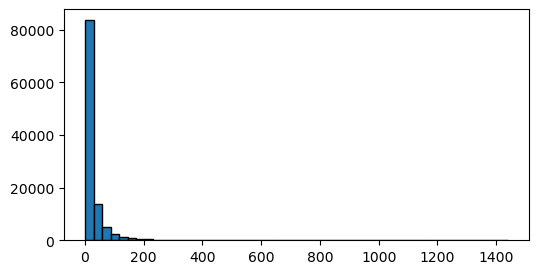

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(6, 3))

ax.hist(
    data['duration'],
    bins=50,
    edgecolor='k',
)
plt.show()

**Q5:** Do you notice anything odd about the distribution for the `duration` column? If so, can you find any additional features of the data that explain the odd aspects? If so, what are they? If not, is there any additional data that could be collected that would help in understanding the odd observations? (**15 pts**)

In [12]:
long_trip_data = data[data['duration'] >= 1200]
long_trip_data.shape

(251, 16)

In [13]:
long_trip_data.groupby(
    'bike_type',
).agg(
    unique_trips=('trip_id', 'nunique')
)

,unique_trips
bike_type,
electric,104
standard,147


In [14]:
long_trip_data.groupby(
    'passholder_type',
).agg(
    unique_trips=('trip_id', 'nunique')
)

,unique_trips
passholder_type,
Annual Pass,1
Monthly Pass,44
One Day Pass,89
Walk-up,117


In [15]:
long_trip_data.groupby(
    'start_date',
).agg(
    unique_trips=('trip_id', 'nunique')
).sort_values(by='unique_trips')

,unique_trips
start_date,
2023-05-05,1
2023-06-04,1
2023-05-12,1
2023-05-14,1
2023-05-01,1
...,...
2023-06-23,7
2023-04-15,7
2023-06-10,8


**Q6:** The company is interested in increasing the number of annual pass holders as these customers generate a more predictable revenue stream. What is the current breakdown of trips by `passholder_type`? (**10 pts**)

In [16]:
data.groupby(
    'passholder_type'
).agg(
    unique_trips=('trip_id', 'nunique')
)

,unique_trips
passholder_type,
Annual Pass,10123
Monthly Pass,65902
One Day Pass,10079
Walk-up,23332


**Q7:** Can you identify any diferences between trips associated with annual pass holders and monthly pass holders that can inform a strategy for converting monthly pass holders to annual pass holders? (**20 pts**)

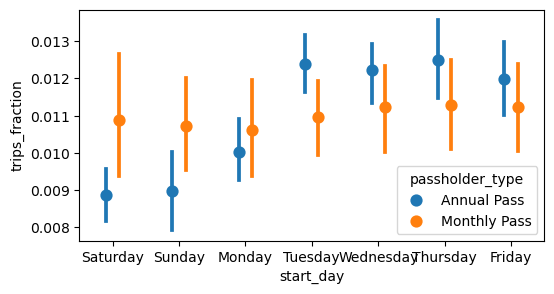

In [17]:
target_passholders_data = data[data['passholder_type'].isin(['Annual Pass', 'Monthly Pass'])]
trips_by_day = target_passholders_data.groupby(
    ['start_date', 'start_day', 'passholder_type']
).agg(
    unique_trips=('trip_id', 'nunique')
).reset_index()

trips_by_day.loc[trips_by_day['passholder_type']=='Annual Pass', 'num_passholders'] = 10123
trips_by_day.loc[trips_by_day['passholder_type']=='Monthly Pass', 'num_passholders'] = 65902
trips_by_day['trips_fraction'] = trips_by_day['unique_trips']/trips_by_day['num_passholders']

fig, ax = plt.subplots(1, 1, figsize=(6, 3))

sns.pointplot(
    trips_by_day,
    x='start_day',
    y='trips_fraction',
    hue='passholder_type',
    join=False,
    dodge=0.2,
)

plt.show()